In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from xgboost import XGBClassifier
# install streamlit
!pip install streamlit

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the data
data = pd.read_csv('Telco-Customer-Churn.csv')

# Display first few rows
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Explore the data
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Data Cleaning
# convert TotalCharges column to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(inplace=True)    # drop the rows with null(missing) values

In [ ]:
# confirm if missing values are dropped
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# drop the customerID column because it is of no use for machine learning
data.drop('customerID', axis=1, inplace=True)

In [ ]:
# Split categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).drop('SeniorCitizen', axis=1, errors='ignore').columns

In [ ]:
# One-hot encoding for categorical columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [ ]:
# now do train-test-split
X = data.drop('Churn_Yes', axis=1)
y = data['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Build a pipeline with scaling and modelling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(random_state=42))])

In [ ]:
# Model evaluation with cross validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-validation Accuracy Scores: [0.78666667 0.79644444 0.78755556 0.77244444 0.77955556]
Mean Accuracy: 0.7845333333333333


In [ ]:
# now we will make xgboost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# hyper parameter tuning using RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.6}


In [ ]:
# final model evaluation
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8009950248756219

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.89      0.87      1033
        True       0.65      0.55      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



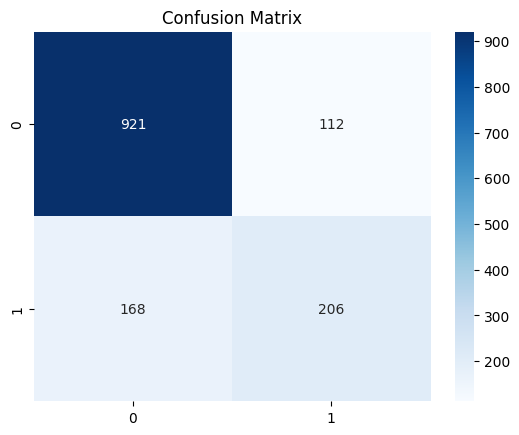

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

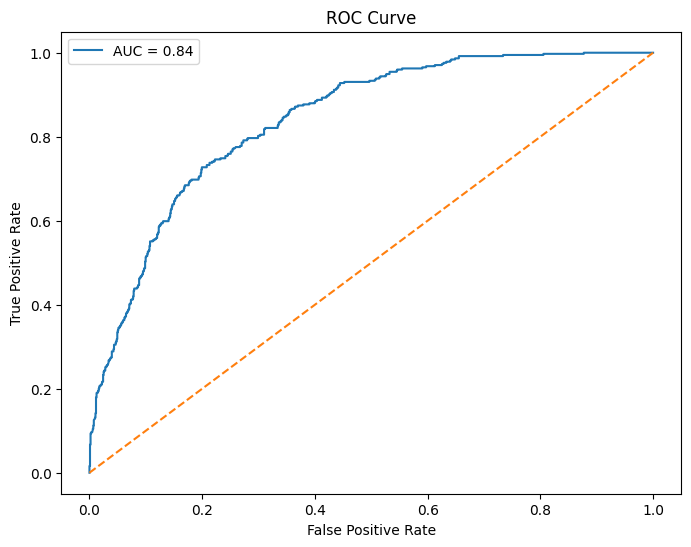

In [ ]:
# ROC Curve
y_pred_proba = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

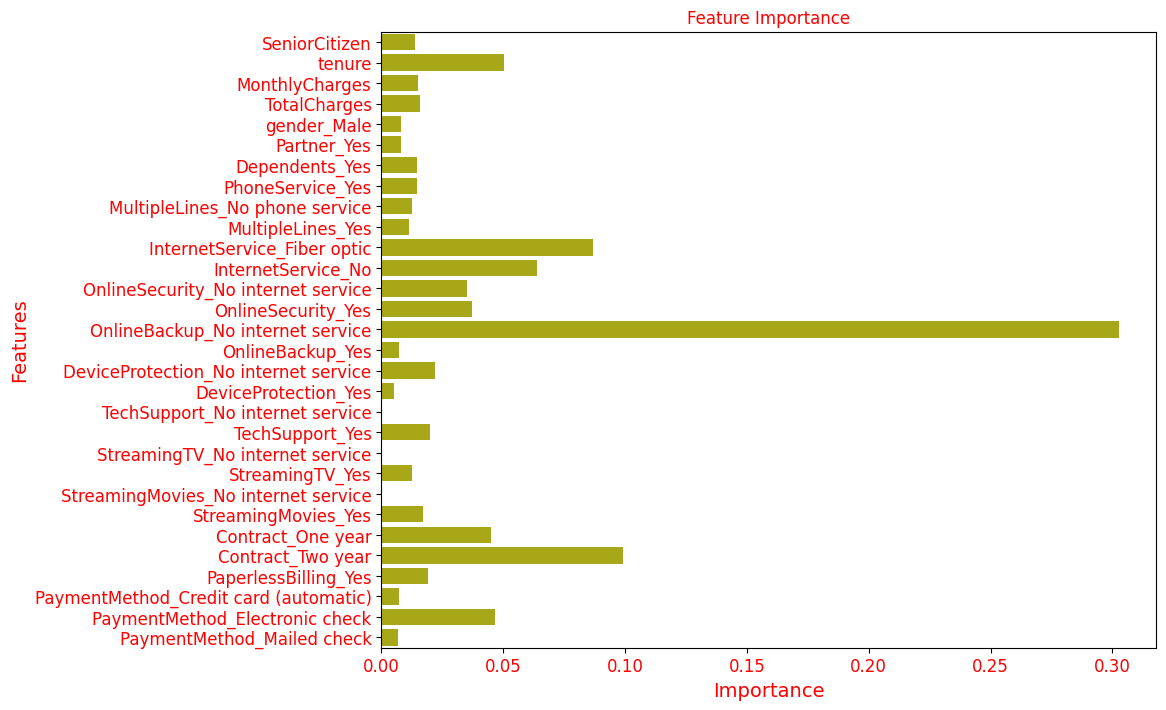

In [ ]:
#  feature importance plot
importances = best_model.feature_importances_
feat_names = X.columns

plt.figure(figsize=(10,8))
sns.barplot(x=importances, y=feat_names, color = 'y')
plt.title('Feature Importance', color = 'r')
plt.xlabel('Importance', color = 'r', fontsize = 14)
plt.ylabel('Features', color = 'r', fontsize = 14)
plt.xticks(fontsize = 12, color = 'r')
plt.yticks(fontsize = 12, color = 'r')
plt.show()

In [ ]:
# save the model
joblib.dump(best_model, 'churn_model_xgb.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
# Now we will do the customer churn prediction
# Load model here
model = joblib.load('churn_model_xgb.pkl')

# customer data example
data = {
    'gender': ['Female'],
    'SeniorCitizen': [0],
    'Partner': ['Yes'],
    'Dependents': ['No'],
    'tenure': [5],
    'PhoneService': ['Yes'],
    'MultipleLines': ['No'],
    'InternetService': ['Fiber optic'],
    'OnlineSecurity': ['No'],
    'OnlineBackup': ['Yes'],
    'DeviceProtection': ['No'],
    'TechSupport': ['No'],
    'StreamingTV': ['Yes'],
    'StreamingMovies': ['Yes'],
    'Contract': ['Month-to-month'],
    'PaperlessBilling': ['Yes'],
    'PaymentMethod': ['Electronic check'],
    'MonthlyCharges': [85.5],
    'TotalCharges': [425.7]
}

# Convert this data to dataframe
customer = pd.DataFrame(data)

# Apply one-hot encoding to data
customer_encoded = pd.get_dummies(customer)

# Get all columns used in training
model_features = model.get_booster().feature_names

# Add missing columns with 0
for col in model_features:
    if col not in customer_encoded.columns:
        customer_encoded[col] = 0

# Ensure correct order
customer_encoded = customer_encoded[model_features]

# Predict
prediction = model.predict(customer_encoded)
probability = model.predict_proba(customer_encoded)[:,1]

print("Prediction:", "Churn" if prediction[0] == 1 else "Not Churn")
print(f"Probability of Churn: {probability[0]*100:.2f}%")

Prediction: Churn
Probability of Churn: 76.68%


In [70]:
# Now we will deploy this ML model using streamlit
%%writefile app.py
import streamlit as st

# Load the trained model
model = joblib.load('churn_model_xgb.pkl')

st.title("Customer Churn Prediction App")

st.subheader("Enter Customer Information")

# User Inputs
gender = st.selectbox('Gender', ['Male', 'Female'])
SeniorCitizen = st.selectbox('Senior Citizen', [0, 1])
Partner = st.selectbox('Partner', ['Yes', 'No'])
Dependents = st.selectbox('Dependents', ['Yes', 'No'])
tenure = st.number_input('Tenure (in months)', min_value=0, max_value=100)
PhoneService = st.selectbox('Phone Service', ['Yes', 'No'])
MultipleLines = st.selectbox('Multiple Lines', ['Yes', 'No', 'No phone service'])
InternetService = st.selectbox('Internet Service', ['DSL', 'Fiber optic', 'No'])
OnlineSecurity = st.selectbox('Online Security', ['Yes', 'No', 'No internet service'])
OnlineBackup = st.selectbox('Online Backup', ['Yes', 'No', 'No internet service'])
DeviceProtection = st.selectbox('Device Protection', ['Yes', 'No', 'No internet service'])
TechSupport = st.selectbox('Tech Support', ['Yes', 'No', 'No internet service'])
StreamingTV = st.selectbox('Streaming TV', ['Yes', 'No', 'No internet service'])
StreamingMovies = st.selectbox('Streaming Movies', ['Yes', 'No', 'No internet service'])
Contract = st.selectbox('Contract', ['Month-to-month', 'One year', 'Two year'])
PaperlessBilling = st.selectbox('Paperless Billing', ['Yes', 'No'])
PaymentMethod = st.selectbox('Payment Method', ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'])
MonthlyCharges = st.number_input('Monthly Charges', min_value=0.0)
TotalCharges = st.number_input('Total Charges', min_value=0.0)

# Create input dataframe
input_data = {
    'gender': [gender],
    'SeniorCitizen': [SeniorCitizen],
    'Partner': [Partner],
    'Dependents': [Dependents],
    'tenure': [tenure],
    'PhoneService': [PhoneService],
    'MultipleLines': [MultipleLines],
    'InternetService': [InternetService],
    'OnlineSecurity': [OnlineSecurity],
    'OnlineBackup': [OnlineBackup],
    'DeviceProtection': [DeviceProtection],
    'TechSupport': [TechSupport],
    'StreamingTV': [StreamingTV],
    'StreamingMovies': [StreamingMovies],
    'Contract': [Contract],
    'PaperlessBilling': [PaperlessBilling],
    'PaymentMethod': [PaymentMethod],
    'MonthlyCharges': [MonthlyCharges],
    'TotalCharges': [TotalCharges]
}

df = pd.DataFrame(input_data)

# Preprocessing (Dummy columns matching training)
df = pd.get_dummies(df)

# Match the model's training features
model_features = model.get_booster().feature_names

for col in model_features:
    if col not in df.columns:
        df[col] = 0

df = df[model_features]

# Prediction
if st.button('Predict Churn'):
    prediction = model.predict(df)
    probability = model.predict_proba(df)[:, 1][0]

    st.subheader('Prediction Result:')
    if prediction[0] == 1:
        st.error(f" Customer is likely to churn with probability {probability*100:.2f}%")
    else:
        st.success(f" Customer is NOT likely to churn with probability {(1-probability)*100:.2f}%")


Overwriting app.py


In [71]:
# load the model
from google.colab import files
files.upload()


Saving churn_model_xgb.pkl to churn_model_xgb (1).pkl


{'churn_model_xgb (1).pkl': b'\x80\x04\x95o\x03\x00\x00\x00\x00\x00\x00\x8c\x0fxgboost.sklearn\x94\x8c\rXGBClassifier\x94\x93\x94)\x81\x94}\x94(\x8c\x0cn_estimators\x94Kd\x8c\tobjective\x94\x8c\x0fbinary:logistic\x94\x8c\tmax_depth\x94K\x03\x8c\nmax_leaves\x94N\x8c\x07max_bin\x94N\x8c\x0bgrow_policy\x94N\x8c\rlearning_rate\x94G?\xb9\x99\x99\x99\x99\x99\x9a\x8c\tverbosity\x94N\x8c\x07booster\x94N\x8c\x0btree_method\x94N\x8c\x05gamma\x94N\x8c\x10min_child_weight\x94N\x8c\x0emax_delta_step\x94N\x8c\tsubsample\x94G?\xe3333333\x8c\x0fsampling_method\x94N\x8c\x10colsample_bytree\x94G?\xe3333333\x8c\x11colsample_bylevel\x94N\x8c\x10colsample_bynode\x94N\x8c\treg_alpha\x94N\x8c\nreg_lambda\x94N\x8c\x10scale_pos_weight\x94N\x8c\nbase_score\x94N\x8c\x07missing\x94G\x7f\xf8\x00\x00\x00\x00\x00\x00\x8c\x11num_parallel_tree\x94N\x8c\x0crandom_state\x94N\x8c\x06n_jobs\x94N\x8c\x14monotone_constraints\x94N\x8c\x17interaction_constraints\x94N\x8c\x0fimportance_type\x94N\x8c\x06device\x94N\x8c\x13valid

In [76]:
!ngrok authtoken 2z0RR8Q*******oqijdzFXnW2P_5W********    # Generate your own key in ngrok

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [90]:
# !pip install pyngrok
# set up ngrok for public URL
from pyngrok import ngrok

# Kill any existing tunnels (optional but safe)
ngrok.kill()

# Start new HTTP tunnel for port 8501 (Streamlit default)
public_url = ngrok.connect(8501, "http")

print("Streamlit App URL:", public_url)


Streamlit App URL: NgrokTunnel: "https://9307-35-245-203-72.ngrok-free.app" -> "http://localhost:8501"


In [91]:
# Kill previous tunnels
ngrok.kill()